# Recommendation System Project

## Context:
India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India
in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by
smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has
made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they
are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the
right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system
based on individual consumer’s behaviour or choice.

## Data Description: 
- <b>author:</b> name of the person who gave the rating
- <b>country:</b> country the person who gave the rating belongs to
- <b>data:</b> date of the rating
- <b>domain:</b> website from which the rating was taken from
- <b>extract:</b> rating content
- <b>language:</b> language in which the rating was given
- <b>product:</b> name of the product/mobile phone for which the rating was given
- <b>score:</b> average rating for the phone
- <b>score_max:</b> highest rating given for the phone
- <b>source:</b> source from where the rating was taken

## Project Objective:
We will build a recommendation system using popularity based and collaborative filtering methods to recommend
mobile phones to a user which are most popular and personalised respectively..

## 1. Import the necessary libraries and read the provided CSVs as a data frame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from surprise import Dataset,Reader
from surprise.model_selection import train_test_split, cross_validate
from surprise import SVD
from surprise import KNNWithMeans
from surprise import accuracy
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")

### Merge the all .csv files

In [2]:
# Read the first file and store into dataframe
dfuserreview1 = pd.read_csv("phone_user_review_file_1.csv", encoding="latin-1")

In [3]:
# Find the number of rows and columns
dfuserreview1.shape

(374910, 11)

<b>Observation:</b>
- There are 374910 rows and 11 attributes in first file set

In [4]:
# Verify the list of columns
dfuserreview1.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [5]:
# Read the second file and store into dataframe
dfuserreview2 = pd.read_csv("phone_user_review_file_2.csv", encoding="latin-1")

In [6]:
# Find the number of rows and columns
dfuserreview2.shape

(114925, 11)

<b>Observation:</b>
- There are 114925 in rows and 11 attributes in second file set

In [7]:
# Verify the list of columns
dfuserreview2.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [8]:
# Read the third file and store into dataframe
dfuserreview3 = pd.read_csv("phone_user_review_file_3.csv", encoding="latin-1")

In [9]:
# Find the number of rows and columns
dfuserreview3.shape

(312961, 11)

<b>Observation:</b>
- There are 312961 in rows and 11 attributes in third file set

In [10]:
# Verify the list of columns
dfuserreview3.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [11]:
# Read the fourth file and store into dataframe
dfuserreview4 = pd.read_csv("phone_user_review_file_4.csv", encoding="latin-1")

In [12]:
# Find the number of rows and columns
dfuserreview4.shape

(98284, 11)

<b>Observation:</b>
- There are 98284 in rows and 11 attributes in fourth file set

In [13]:
# Verify the list of columns
dfuserreview4.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [14]:
# Read the fifth file and store into dataframe
dfuserreview5 = pd.read_csv("phone_user_review_file_5.csv", encoding="latin-1")

In [15]:
# Find the number of rows and columns
dfuserreview5.shape

(350216, 11)

<b>Observation:</b>
- There are 350216 in rows and 11 attributes in fifth file set

In [16]:
# Verify the list of columns
dfuserreview5.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [17]:
# Read the sixth file and store into dataframe
dfuserreview6 = pd.read_csv("phone_user_review_file_6.csv", encoding="latin-1")

In [18]:
# Find the number of rows and columns
dfuserreview6.shape

(163837, 11)

<b>Observation:</b>
- There are 163837 in rows and 11 attributes in sixth file set

In [19]:
# Verify the list of columns
dfuserreview6.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [20]:
# Merge all dataframes into one dataframe
df_final = pd.concat([dfuserreview1, dfuserreview2, dfuserreview3, dfuserreview4, dfuserreview5, dfuserreview6])

In [21]:
df_final.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


### Shape of merged dataframe and observations

In [22]:
# Find the number of rows and columns in merged dataframe
df_final.shape

(1415133, 11)

<b>Observation:</b>
- The merged dataset has 1415133 rows and 11 attributes. 

In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


<b>Observation:</b>
- There are missing values in score, score_max, extract, author and product attributes. 
- score and score_max are numeric values and data type for rest of the attribues is object. 

In [24]:
# Five points summary
df_final.describe()

,score,score_max
count,1.351644e+06,1351644.0
mean,8.007060e+00,10.0
std,2.616121e+00,0.0
min,2.000000e-01,10.0
25%,7.200000e+00,10.0
50%,9.200000e+00,10.0
75%,1.000000e+01,10.0
max,1.000000e+01,10.0


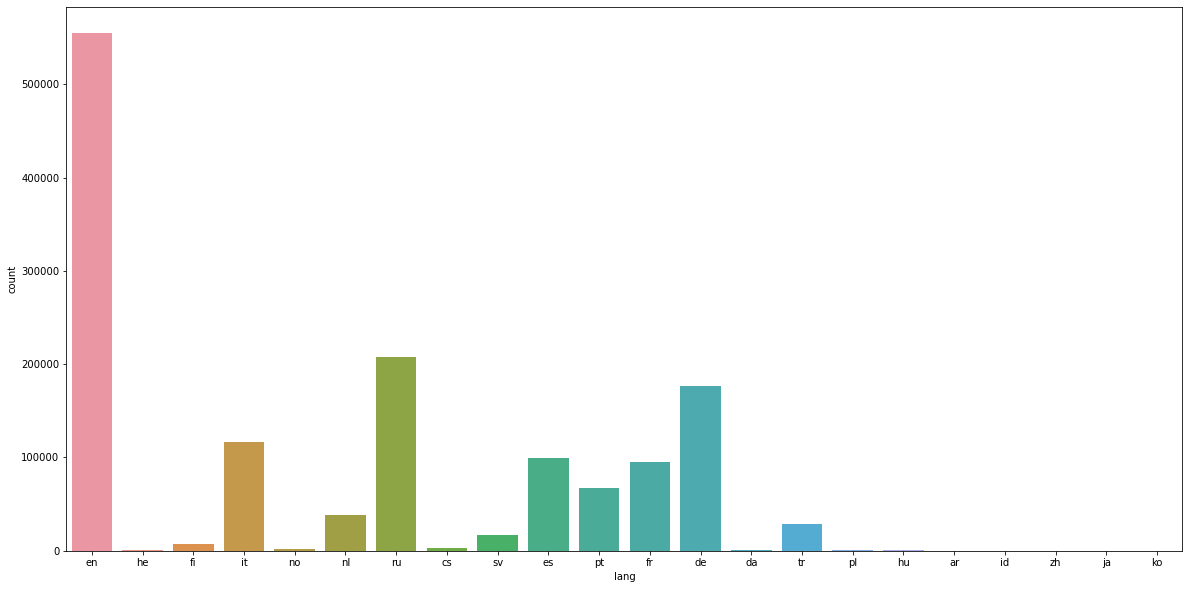

In [25]:
# Plotting the graph for lang attribute
plt.figure(figsize=(20,10))
sns.countplot(df_final['lang'])

<b>Observation:</b>
- There are more reviews in Engligh launguage.

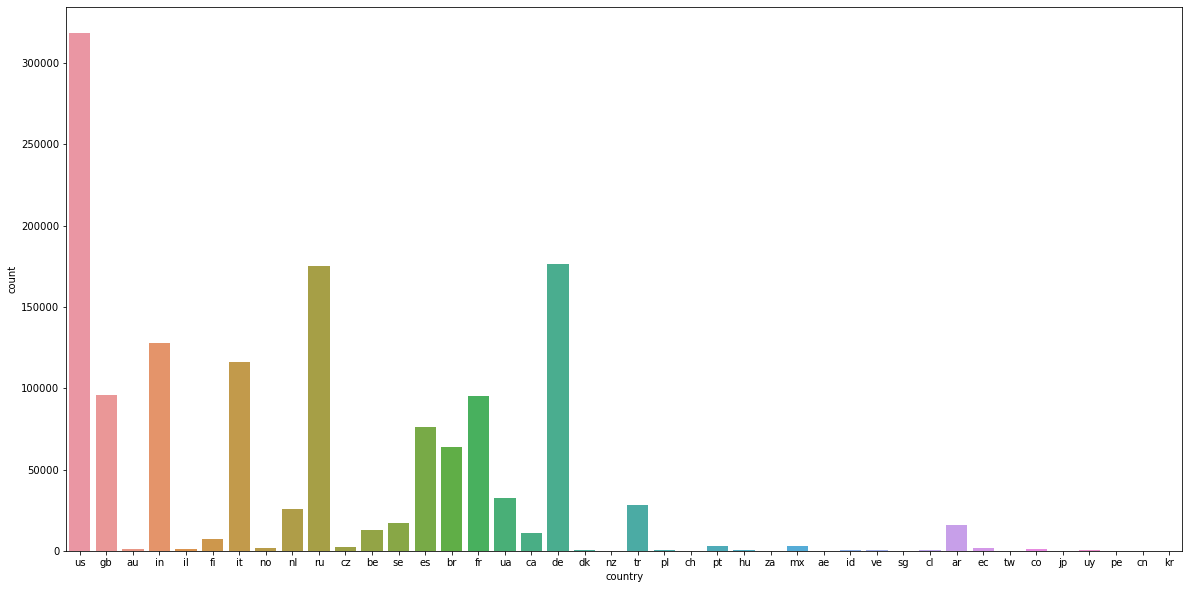

In [26]:
# plotting the grapy for country attribute
plt.figure(figsize=(20,10))
sns.countplot(df_final['country'])

<b>Observation:</b>
- There are more reviews from US region. 

In [27]:
# Checking the value counts for each class in source attribute
df_final['source'].value_counts().head(1500000)

Amazon           728471
Yandex           123066
Ciao              59425
Samsung           45585
MercadoLibre      33531
                  ...  
Office Depot          1
DWI                   1
Elkj??p               1
Shop Your Way         1
 SHOP                 1
Name: source, Length: 331, dtype: int64

<b>Observation:</b>
- There are more reviews from Amazon. 

In [28]:
# Checking the value counts for each class in domain attribute
df_final['domain'].value_counts().head(1500000)

amazon.com          214776
amazon.de           132720
market.yandex.ru    123066
amazon.in           112880
amazon.it            89533
                     ...  
euronics.fi              1
skapiec.pl               1
staples.nl               1
officedepot.com          1
qvc.de                   1
Name: domain, Length: 384, dtype: int64

<b>Observation:</b>
- There are more reviews from amazon.com

In [29]:
# Checking the total review counts for each attribute
df_final['product'].value_counts().head(1500000)

Lenovo Vibe K4 Note (White,16GB)                                                    5226
Lenovo Vibe K4 Note (Black, 16GB)                                                   4390
OnePlus 3 (Graphite, 64 GB)                                                         4103
OnePlus 3 (Soft Gold, 64 GB)                                                        3563
Huawei P8lite zwart / 16 GB                                                         2707
                                                                                    ... 
Samsung G389F GALAXY Xcover 3 VE unlocked                                              1
Lenovo Vibe P1a42 (2GB RAM , 32GB , Grey)                                              1
Smartphone LG Optimus L7 II, 3G, Dual Chip, Android 4.1, CÃ¢mera 8MP, 4GB - P714       1
Sony PartNumber: XPERIA M DUAL WH : Sony Mobile Xperia M dual                          1
Nokia 808 Pureview white                                                               1
Name: product, Length

<b>Observation:</b>
- There is highest number of reviews for product Lenovo Vibe K4 Note (White,16GB).

In [30]:
# Checking the number of reviews for each score
df_final['score'].value_counts().head(1500000)

10.0    656239
8.0     296018
2.0     128485
6.0     116616
4.0      72462
         ...  
0.4          2
4.9          1
1.5          1
8.9          1
6.1          1
Name: score, Length: 86, dtype: int64

<b>Observation:</b>
- Many users provided the highest rating 10 for productus. 

In [31]:
# Checking the number of reviews for each score_max
df_final['score_max'].value_counts().head(1500000)

10.0    1351644
Name: score_max, dtype: int64

<b>Observation:</b>
- All the products are having highest rating 10 (i.e) at least one user has provided highest rating 10 for the product. 

### Round off scores to the nearest integers

In [32]:
# Round off the score value using round function
df_final['score'] = round(df_final['score'])

# Round off the score_max value using round function
df_final['score_max'] = round(df_final['score_max'])

In [33]:
# Checking Score and Score_max values are rounded off
df_final.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.0,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


### Impute the missing values

In [34]:
# Impute the missing values for score and score_max using median
df_final['score'].fillna(df_final['score'].median(), inplace=True)
df_final['score_max'].fillna(df_final['score_max'].median(), inplace=True)

# Impute the missing values for author, product and extract using mode
df_final['author'].fillna(df_final['author'].mode()[0], inplace=True)
df_final['product'].fillna(df_final['product'].mode()[0], inplace=True)
df_final['extract'].fillna(df_final['extract'].mode()[0], inplace=True)

In [35]:
# Verify that any missing values in dataset
df_final.isnull().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

<b>Observation:</b>
- There is no missing value in dataset. All the missing values are imputed successfully. 

### Handling duplicate rows

In [36]:
# Checking number of duplicate rows
df_final.duplicated().sum()

6458

<b>Observation:</b>
- There are 6458 duplicated rows in dataset.

In [37]:
# Dropping duplicate values 
df_final.drop_duplicates(keep='first',inplace=True) 

In [38]:
# Checking any duplicated rows
df_final[df_final.duplicated()] 

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product


In [39]:
# Checking total row counts after removing duplicates. 
df_final.shape

(1408675, 11)

<b>Observation:</b>
- There are 1408675 rows after removing duplicates.  

### Keep only 1000000 data samples. Use random state=612

In [40]:
# Take the 1M data sampels randomly using sample function
df_data_final = df_final.sample(n=1000000, random_state=612)

In [41]:
# Checking the number of rows and attributes for sample
df_data_final.shape

(1000000, 11)

### Drop irrelevant features

In [42]:
# Dropping irrelevant features
df_data_final.drop(['phone_url','date','lang','country','source','domain','score_max','extract'], axis=1, inplace=True)

In [43]:
# Checking the number of rows and columns in final data set
df_data_final.shape

(1000000, 3)

<b>Observation:</b>
- There are 1000000 rows and 3 attributes. 

In [44]:
# Checking the duplicates after removing the irrelevant features
df_data_final.duplicated().sum()

117219

In [45]:
# Dropping duplicate values 
df_data_final.drop_duplicates(keep='first',inplace=True) 

In [46]:
# Checking any duplicated rows
df_data_final[df_data_final.duplicated()] 

,score,author,product


## 2. Answer the following

### Identify the most rated products

In [47]:
# Find the most rated products
df_data_final.groupby(["product","score"]).size().reset_index(name='counts').sort_values(by=['counts',"score"],ascending=False)

,product,score,counts
86397,"OnePlus 3 (Graphite, 64 GB)",10.0,1117
86402,"OnePlus 3 (Soft Gold, 64 GB)",10.0,862
112344,Samsung Galaxy S7 edge 32GB (T-Mobile),10.0,821
112366,Samsung Galaxy S7 edge 32GB (Verizon),10.0,800
84524,Nokia N95,10.0,772
...,...,...,...
76828,Nokia 6300,0.0,1
119137,Samsung SGH-C260,0.0,1
119390,Samsung SGH-E210,0.0,1
120165,Samsung SGH-S3500,0.0,1


<b>Observation:</b>
- OnePlus 3 (Graphite, 64 GB) is having highest number of ratings. 
- OnePlus 3 (Soft Gold, 64 GB) is having second highest number of ratings. 
- Samsung Galaxy S7 edge 32GB (T-Mobile) is having third highest number of ratings. 

### Identify the users with most number of reviews

In [48]:
df_data_final.groupby(["author"]).size().reset_index(name='counts').sort_values(by='counts',ascending=False)

,author,counts
22606,Amazon Customer,25082
72234,Cliente Amazon,5242
72215,Client d'Amazon,2252
22927,Amazon Kunde,1593
30999,Anonymous,1403
...,...,...
211861,Ludo17,1
211860,Ludo Of Genesis,1
211859,Ludo Borgers,1
211857,Ludmille,1


<b>Observation:</b>
- 'Amazon Customer' user has given highest number of reviews on the products. 
- 'Cliente Amazon' user has given second hightest number of reviews on the products. 
- 'Client d''Amazon' user has given third highest number of reviews on the products. 

### Select the data with products having more than 50 ratings and users who have given more than 50 ratings

In [49]:
# Getting the data with products having more than 50 ratings
prd_count = df_data_final['product'].value_counts()
df_top_prod = df_data_final[df_data_final['product'].isin(prd_count[prd_count>=50].index)]

# Getting the data with users who have given more than 50 ratings from data frame which has more than 50 ratings for products.
author_count = df_top_prod['author'].value_counts()
df_top_all = df_top_prod[df_top_prod['author'].isin(author_count[author_count>=50].index)]
df_top_all.head(100)

,score,author,product
292303,8.0,Cliente Amazon,"Alcatel One Touch 20-04G Telefono Cellulare, Nero"
24371,8.0,Anthony,Motorola Moto E Smartphone dÃ©bloquÃ© 3G (Ecra...
257176,8.0,Amazon Customer,Sony Ericsson W595
109934,10.0,Amazon Customer,"BlackBerry Z30 Unlocked Cellphone, 16GB, Black"
55952,2.0,Amazon Customer,"Lenovo Vibe K4 Note (White,16GB)"
...,...,...,...
243160,10.0,e-bit,Smartphone Motorola Moto X 2Âª GeraÃ§Ã£o XT109...
15239,9.0,ÐÐ°ÑÐ¸Ñ,Sony Xperia J (ÑÐµÑÐ½ÑÐ¹)
108759,2.0,Amazon Customer,Apple iPhone 5c 16GB (Yellow) - Unlocked
217257,2.0,Amazon Customer,"Apple iPhone 6 Plus Unlocked Cellphone, 16GB, ..."


### Shape of final dataset

In [50]:
df_top_all.shape

(30150, 3)

<b>Observation:</b>
- There are 30150 rows and 3 attributes in final dataset

## 3. Build a popularity based model and recommend top 5 mobile phones

In [51]:
# Find the mean score for each product
ratings_mean_count = pd.DataFrame(df_top_all.groupby('product')['score'].mean()) 

In [52]:
# Find the number of ratings for products
ratings_mean_count['rating_counts'] = pd.DataFrame(df_top_all.groupby('product')['score'].count()) 

In [53]:
# Normally, one product has hight rating 10 from only user (i.e) the mean of product is still 10. This product will always 
# recommended. This is not correct. To avoid this, we need to consider number of rating for the product as well. Hence, 
# we are calculating top score by multiplying score with number of ratings for products. 

ratings_mean_count['topscore'] = ratings_mean_count['rating_counts']*ratings_mean_count['score']

In [54]:
# Getting top 5 mobile phones
ratings_mean_count.sort_values(by='topscore', ascending=False).head()

,score,rating_counts,topscore
product,,,
Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),8.645161,124,1072.0
"Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]",8.823529,102,900.0
Sony Xperia Z (Ð±ÐµÐ»ÑÐ¹),8.835052,97,857.0
Sony Xperia Z (ÑÐµÑÐ½ÑÐ¹),8.591398,93,799.0
"Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia]",8.559140,93,796.0


## 4. Build a collaborative filtering model using SVD

In [55]:
# Set the rating scale
reader = Reader(rating_scale=(df_top_all['score'].min(), df_top_all['score'].max()))

In [56]:
# Convert the data into surprise format
data = Dataset.load_from_df(df_top_all[['author', 'product', 'score']], reader)

In [57]:
# Verify the data that converted into surprise format
type(data)

surprise.dataset.DatasetAutoFolds

In [58]:
# Split data into train and test sets
trainset, testset = train_test_split(data, test_size=.25,random_state=10)

In [59]:
#Initiating the SVD 
svd_model = SVD(random_state=10)
# Train the model
svd_model.fit(trainset)

In [60]:
# Find the prediction on test data
test_pred_svd = svd_model.test(testset)

In [61]:
# Find the accuracy by computing RMSE
accuracy.rmse(test_pred_svd)

RMSE: 2.9671


2.9670836725388186

In [62]:
accuracy.mae(test_pred_svd)

MAE:  2.3553


2.355316185180489

In [63]:
# Convert predicted recommendation into data frame
test_pred_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in test_pred_svd], columns=["author","product","est_score"])

In [64]:
# Sorting the value by est_score descending order
test_pred_df.sort_values(by = ["est_score"],ascending=False,inplace=True)

In [65]:
test_pred_df.head()

,author,product,est_score
6701,ÐÐ»Ð°Ð´Ð¸ÑÐ»Ð°Ð²,Samsung Galaxy A5 (2016),10.0
1288,fabio,"LG D855 G3 Smartphone, 32 GB, Nero Metallico [...",10.0
5870,Francesco,"Samsung Galaxy J5 Smartphone, Nero [Italia]",10.0
1216,David,"MICROSOFT Lumia 650 - 16 GB, Black",10.0
2178,Mario,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",10.0


In [66]:
SVDPredAvgRating = np.mean(test_pred_df['est_score'])
print("Average Rating:", SVDPredAvgRating)

Average Rating: 7.634295589777678


In [67]:
# Create the function for getting top recommendations
def get_recomm_SVD(userID,n):
    recomm = test_pred_df[test_pred_df['author']==userID][['author','product','est_score']].sort_values(by='est_score',ascending=False).head(n)
    return recomm

In [68]:
# Recommending top products for the user
get_recomm_SVD('Marco',5)

,author,product,est_score
2864,Marco,"Asus ZenFone 5 Smartphone, 16 GB, RAM 2 GB, Ne...",9.605734
372,Marco,Apple iPhone 5C 16GB - sbloccato - blu / ciano,9.303817
1029,Marco,"Huawei Ascend P8 Smartphone, Display 5.2"" FHD,...",9.295102
3994,Marco,"Huawei Ascend P8 Smartphone, Display 5.2"" FHD,...",9.295102
4158,Marco,"Samsung Galaxy S Advance, Display 4 Pollici, W...",9.196091


In [69]:
get_recomm_SVD('David',5)

,author,product,est_score
1216,David,"MICROSOFT Lumia 650 - 16 GB, Black",10.000000
6512,David,"MICROSOFT Lumia 650 - 16 GB, Black",10.000000
3096,David,"Samsung Galaxy J5 Smartphone (5 Zoll (12,7 cm)...",9.996035
962,David,LG G2 mini - Smartphone libre Android (Pantall...,9.948839
1343,David,Nokia 808 PureView Unlocked Phone with a 41 MP...,9.880541


## 5. Build a collaborative filtering model using KNNWithMeans from Surprise

#### User Based Collaborative Filtering

In [70]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
knn = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': True})
# Train the model for trainset (Note: Trainset already converted into surprise format in SVD model. We can reuse the same)
knn.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [71]:
# Predict the recommendations for test set (Note: Test already converted into surprise format in SVD model. 
# We can reuse the same)
test_pred_user = knn.test(testset)

In [72]:
# Get accuracy by RMSE
accuracy.rmse(test_pred_user)

RMSE: 2.9204


2.9204205061511876

In [73]:
preduser = pd.DataFrame(test_pred_user)

In [74]:
UBPredAvgRating = np.mean(preduser['est'])
print("Average Rating:", UBPredAvgRating)

Average Rating: 7.671408796506113


In [75]:
# Create the function for getting top recommendations.
def get_recomm_userbased(userID,n):
    recomm = preduser[preduser['uid']==userID][['uid','iid','est']].sort_values(by='est',ascending=False).head(n)
    return recomm

In [78]:
# Find the top 5 recommendations
get_recomm_userbased('Amazon Customer', 5)

,uid,iid,est
5984,Amazon Customer,Sony Ericsson W508,10.0
4730,Amazon Customer,"Apple iPhone 6, Silver, 128 GB (Verizon)",10.0
5339,Amazon Customer,Motorola W220,10.0
7275,Amazon Customer,"Apple iPhone 6, Silver, 128 GB (Verizon)",10.0
6898,Amazon Customer,Samsung Verizon Samsung Alias 2 U750 No Contra...,10.0


In [80]:
# Find the top 5 recommendations
get_recomm_userbased('Peter', 5)

,uid,iid,est
525,Peter,Sim Free Samsung Galaxy S7 Edge Mobile Phone -...,10.000000
1515,Peter,"Samsung Galaxy S III i9300 Smartphone (4,8 Zol...",9.801837
6693,Peter,LG Electronics E430 Optimus L3 II Smartphone (...,9.759627
6114,Peter,"Sony Ericsson Cedar Handy (UMTS, HSDPA, 2MP, 3...",9.450087
2603,Peter,Nokia 6021,9.125562


#### Item Based Collaborative Filtering

In [81]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
knnitem = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': False})
# Train the model
knnitem.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [82]:
# Predict the recommendations for test set
test_pred_item = knnitem.test(testset)

In [83]:
# Get the accuracy by RMSE
accuracy.rmse(test_pred_item)

RMSE: 2.9557


2.955724973099792

In [84]:
preditem = pd.DataFrame(test_pred_item)

In [85]:
ItmPredAvgRating = np.mean(preditem["est"])
print("Average Rating:", ItmPredAvgRating)

Average Rating: 7.680518350210292


In [86]:
# Create the function
def get_recommitem(itemID,n):
    recomm = preditem[preditem['uid']==itemID][['uid','iid','est']].sort_values(by='est',ascending=False).head(n)
    return recomm

In [87]:
# Find the top 5 recommendations
get_recommitem('Cliente Amazon', 5)

,uid,iid,est
2551,Cliente Amazon,"Honor 6 - Smartphone libre (pantalla de 5"", 16...",9.891433
4623,Cliente Amazon,"Asus ZenFone 5 Smartphone, 8 GB, RAM 2 GB, Ner...",9.874469
646,Cliente Amazon,"Microsoft Lumia 640 LTE RM 1072 Smartphone, Ma...",9.771094
2124,Cliente Amazon,"Alcatel One Touch Idol 3 Smartphone, 4.7"", Dua...",9.691789
4777,Cliente Amazon,"Alcatel One Touch Idol 3 Smartphone, 4.7"", Dua...",9.691789


In [88]:
# Find the top 5 recommendations
get_recommitem('Peter', 5)

,uid,iid,est
1515,Peter,"Samsung Galaxy S III i9300 Smartphone (4,8 Zol...",9.864268
6693,Peter,LG Electronics E430 Optimus L3 II Smartphone (...,9.704355
1479,Peter,"Huawei P9 grijs, zwart / 32 GB",9.428356
2675,Peter,Samsung Galaxy S7 Edge zwart / 32 GB,9.417323
6114,Peter,"Sony Ericsson Cedar Handy (UMTS, HSDPA, 2MP, 3...",9.382651


## 6. Evaluate the collaborative model

In [89]:
userrmse = accuracy.rmse(test_pred_user, verbose=False)
usermae = accuracy.mae(test_pred_user, verbose=False)
itemrmse = accuracy.rmse(test_pred_item, verbose=False)
itemmae = accuracy.mae(test_pred_item, verbose=False)
svdrmse = accuracy.rmse(test_pred_svd, verbose=False)
svdmae = accuracy.mae(test_pred_svd, verbose=False)

# initialize list of lists 
data = [['SVD', svdrmse, svdmae],['User Based', userrmse, usermae], ['Item Based', itemrmse, itemmae]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Collaborative Model', 'RMSE', 'MAE']) 
df

,Collaborative Model,RMSE,MAE
0,SVD,2.967084,2.355316
1,User Based,2.920421,2.258335
2,Item Based,2.955725,2.301350


<b>Observation:</b>
- Used based is having less error when compared to item based model. Hence, user based model is better model than item based.

## 7. Predict score (average rating) for test users

In [90]:
data = [['SVD', SVDPredAvgRating],['User Based', UBPredAvgRating], ['Item Based', ItmPredAvgRating]] 
avg = pd.DataFrame(data, columns = ['Model', 'Avg Prediction Rating']) 
avg

,Model,Avg Prediction Rating
0,SVD,7.634296
1,User Based,7.671409
2,Item Based,7.680518


<b>Observation:</b>
- Average predicted score is 7.6 for all the models (SVD, User Based and Item Based Collaborative models)

## 8. Report findings and inferences

- Done EDA to understand the data in precise way and found that most of the users have given 10 rating. Which gives us an important information that Oneplus 3 smart phone is having top rating. 
- We have dropped irrelevant features and kept author, score and product for model building. 
- Taken the subset of data based on products having more than 50 ratings and users who have given more than 50 ratings to overcome the Grey ship problem.
- In Popularity Model, shown the top 5 recommended products irrespective of users. This means same top 5 products will be recommended to each user.
- SVD has given RMSE 2.967084 and KNNWithMeans for Usser based and Item based have given RMSE 2.920421 and 2.955725 respectively. User based is better model when compared to SVD and Item based collaborative models. 
- Also, Average prediction rating alomost same 7.6 across the models SVD, User based and Item based collaborative models. 
- SVD computatioal time is very less than other models computational time. 
 

## 9. Try and recommend top 5 products for test users

<b>SVD:</b>

In [91]:
# Recommending top products for the user
get_recomm_SVD('Amazon Customer',5)

,author,product,est_score
4578,Amazon Customer,"Sony Xperia L Smartphone (10,9 cm (4,3 Zoll) T...",9.542306
2926,Amazon Customer,"Samsung Galaxy S5 SIM-Free Smartphone, SM-G900...",9.337854
4687,Amazon Customer,"Huawei Ascend P7 mini Smartphone (4,5 Zoll (11...",9.312220
1641,Amazon Customer,BlackBerry Torch 9810 Unlocked GSM Phone with ...,9.299655
6448,Amazon Customer,Samsung Galaxy S III (S3) Triband White (Boost...,9.256614


In [92]:
get_recomm_SVD('Peter',5)

,author,product,est_score
2675,Peter,Samsung Galaxy S7 Edge zwart / 32 GB,9.669629
2571,Peter,"Samsung Galaxy S5 Smartphone (5,1 Zoll (12,9 c...",9.582568
1479,Peter,"Huawei P9 grijs, zwart / 32 GB",9.402874
6862,Peter,"APPLE iPhone 7 - Silver, 128 GB",9.283333
3832,Peter,Samsung Galaxy Note II N7100 Smartphone 16GB (...,9.229690


<b>User Based Collaborative Filter:</b>

In [94]:
# Find the top 5 recommendations
get_recomm_userbased('Amazon Customer', 5)

,uid,iid,est
5984,Amazon Customer,Sony Ericsson W508,10.0
4730,Amazon Customer,"Apple iPhone 6, Silver, 128 GB (Verizon)",10.0
5339,Amazon Customer,Motorola W220,10.0
7275,Amazon Customer,"Apple iPhone 6, Silver, 128 GB (Verizon)",10.0
6898,Amazon Customer,Samsung Verizon Samsung Alias 2 U750 No Contra...,10.0


In [95]:
# Find the top 5 recommendations for another user
get_recomm_userbased('Peter', 5)

,uid,iid,est
525,Peter,Sim Free Samsung Galaxy S7 Edge Mobile Phone -...,10.000000
1515,Peter,"Samsung Galaxy S III i9300 Smartphone (4,8 Zol...",9.801837
6693,Peter,LG Electronics E430 Optimus L3 II Smartphone (...,9.759627
6114,Peter,"Sony Ericsson Cedar Handy (UMTS, HSDPA, 2MP, 3...",9.450087
2603,Peter,Nokia 6021,9.125562


<b>Item Based Collaborative Filter:</b>

In [96]:
# Find the top 5 recommendations
get_recommitem('Amazon Customer', 5)

,uid,iid,est
5718,Amazon Customer,Samsung Focus I917 Unlocked Phone with Windows...,10.0
2926,Amazon Customer,"Samsung Galaxy S5 SIM-Free Smartphone, SM-G900...",10.0
7293,Amazon Customer,LG Optimus G,10.0
1692,Amazon Customer,"Samsung Galaxy S3 i9300 Unlocked Cellphone, In...",10.0
5516,Amazon Customer,LG G3 s D722,10.0


In [97]:
get_recommitem('Peter', 5)

,uid,iid,est
1515,Peter,"Samsung Galaxy S III i9300 Smartphone (4,8 Zol...",9.864268
6693,Peter,LG Electronics E430 Optimus L3 II Smartphone (...,9.704355
1479,Peter,"Huawei P9 grijs, zwart / 32 GB",9.428356
2675,Peter,Samsung Galaxy S7 Edge zwart / 32 GB,9.417323
6114,Peter,"Sony Ericsson Cedar Handy (UMTS, HSDPA, 2MP, 3...",9.382651


<b>Observation:</b>
- We are getting different top productions from differnt models for same users. 

## 11. Try cross validation techniques to get better results

In [98]:
# Set the rating scale
reader = Reader(rating_scale=(df_top_all['score'].min(), df_top_all['score'].max()))

# Convert the data into surprise format
data = Dataset.load_from_df(df_top_all[['author', 'product', 'score']], reader)

In [99]:
# Creating Model using best parameters
svd_model = SVD()

# Training the algorithm on the trainset
#svd_model.fit(trainset)

# Evaluating RMSE, MAE of algorithm SVD on 5 split(s) by cross validation
svd_cv = cross_validate(svd_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.9870  2.9252  2.9530  2.9679  2.9600  2.9586  0.0202  
MAE (testset)     2.3837  2.3290  2.3520  2.3693  2.3591  2.3586  0.0183  
Fit time          2.09    2.18    2.35    2.13    2.21    2.19    0.09    
Test time         0.13    0.06    0.09    0.06    0.06    0.08    0.03    


<b>Observation:</b>
- Mean RMSE of 5 folds is 2.9586 which is slight less than RMSE (2.967084) which we got using train and test split. 

In [100]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
knn_user = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': True})

# Evaluating RMSE, MAE of algorithm SVD on 5 split(s) by cross validation
knn_user_cv = cross_validate(knn_user, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.8850  2.8427  2.8292  2.8332  2.9004  2.8581  0.0290  
MAE (testset)     2.2549  2.2171  2.2047  2.2070  2.2588  2.2285  0.0235  
Fit time          0.12    0.10    0.10    0.11    0.09    0.10    0.01    
Test time         0.37    0.36    0.38    0.40    0.36    0.37    0.02    


<b>Observation:</b>
- Mean RMSE of 5 folds is 2.8581 which is less than RMSE (2.920421) which we got using train and test split.

In [101]:
# Use user_based true/false to switch between item-based or item-based collaborative filtering
knn_user = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': False})

# Evaluating RMSE, MAE of algorithm SVD on 5 split(s) by cross validation
knn_user_cv = cross_validate(knn_user, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.9205  2.9248  2.8879  2.8827  2.8993  2.9030  0.0169  
MAE (testset)     2.2712  2.2917  2.2666  2.2497  2.2681  2.2695  0.0134  
Fit time          20.01   14.39   17.03   15.03   16.23   16.54   1.96    
Test time         13.48   15.30   13.77   13.73   13.87   14.03   0.65    


<b>Observation:</b>
- Mean RMSE of 5 folds is 2.9030 which is less than RMSE (2.955725) which we got using train and test split

<b>Take Away:</b>
- We have got less RMSE for User based model using Cross-validtion and train test split. Also, average prediction rating is 7.6. Hence, we can conlude that User based model is best model for recommendation. 

## 12. In what business scenario you should use popularity based Recommendation Systems?

As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if a product is often purchased by most people then the system will get to know that that product is most popular so for every new user who just signed it, the system will recommend that product to that user also and chances becomes high that the new user will also purchase that. 

- It does not suffer from cold start problems which means on day 1 of the business also it can recommend products on various different filters.
- There is no need for the user's historical data.
- Not personalized.
- The system would recommend the same sort of products/movies which are solely based upon popularity to every other user.
- Real time example: Youtube tranding videos. 

## 13. In what business scenario you should use CF based Recommendation Systems?

Collaborative filtering is a type of personalized recommendation strategy that identifies the similarities between users (based on site interactions) to serve relevant product recommendations across digital properties. Recommender systems collect user information, mining this data to inform which items to display.

One of the many processes for collaborative filtering, the neighborhood approach produces product recommendations, making predictions based both on products users have previously engaged with and shared affinities between users. The system identifies users with similar behaviors, tracking their interactions, purchases, add-to-carts, and more to recommend products a user is likely interested in.

Amazon is known for its use of collaborative filtering, matching products to users based on past purchases. For example, the system can identify all of the products a customer and users with similar behaviors have purchased and/or positively rated. It then can identify other products in any product category the target user may like, computing similarities between products, suggesting them to them through recommendation.

The key benefit of onboarding a product recommendation engine is to enhance the discovery experience. With merchants often selling hundreds of thousands of products on their sites, it’s up to marketers to find creative ways to surface the right products to each visitor. Using collaborative filtering algorithms, brands can effectively recommend items to users at scale, potentially presenting items a consumer might not have necessarily realized they were, in fact, interested in purchasing.

<b>Limitations:</b>
- Enough users required to find a match. To overcome such cold start problems, often hybrid approaches are made use of between CF and Content-based matching.
- Even if there are many users and many items that are to be recommended often, problems can arise of user and rating matrix to be sparse and will become challenging to find out about the users who have rated the same item.
- The problem in recommending items to the user due to sparsity problems.

## 14. What other possible methods can you think of which can further improve the recommendation for different users?

There are some other methods available in Recommendation systems which can help us to improve further for recommendation for different users. 

<b>Content-Based Recommendation System:</b>
- A content based recommender works with data that the user provides, either explicitly (rating) or implicitly (clicking on a link). Based on that data, a user profile is generated, which is then used to make suggestions to the user. As the user provides more inputs or takes actions on the recommendations, the engine becomes more and more accurate.

<b>Demographic-Based Recommendation System:</b>
- Demographic Recommender system generate recommendations based on the user
demographic attributes. It categorize the users based on their attributes and
recommends the movies by utilizing their demographic data. In contrast to
collaborative filtering and content based recommender system, it is easy to implement
and does not require user ratings.

<b>Hybrid Recommender System:</b>
- Hybridization of demographic and collaborative filtering approaches had been
employed to solve cold start problem. Hybrid model based approach has been
applied on Movie data set to enhance recommendation quality. Additionally
Collaborative filtering and Demographic based approach had been used to modify
similarity calculation.